# Workshop 6

Starter code for workshop 6. You should have seen most of it before, but make sure you understand what it is doing!

Modified by Hu Wang.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To plot even prettier figures
import seaborn as sn

# General data handling (pure numerics are better in numpy)
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
xarray = data.data
yarray = data.target
print(xarray.shape)
print(yarray.shape)
fullarray = np.concatenate((xarray,np.reshape(yarray,(-1,1))),axis=1)
print(fullarray.shape)

(569, 30)
(569,)
(569, 31)


In [4]:
fullarray[:,-1] = 1 - fullarray[:,-1]   # now invert the labels (so that malignant=1)
df = pd.DataFrame(fullarray,columns = list(data.feature_names) + ['target'])

Your code starts here...

# Splitting into separate datasets

In [6]:
from sklearn.model_selection import train_test_split

bigtrain_set, test_set = train_test_split(fullarray, test_size=0.2, random_state=42, stratify=fullarray[:,-1])
train_set, val_set = train_test_split(bigtrain_set, test_size=0.1, random_state=42, stratify=bigtrain_set[:,-1])

**Note the use of "stratify" in the calls above, as these make sure that each dataset has roughly the same proportions of the classes.**

In [7]:
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]
X_val = val_set[:,:-1]
y_val = val_set[:,-1]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(409, 30), (409,), (114, 30), (114,), (46, 30), (46,)]


In [8]:
print(np.mean(y_train),np.mean(y_test),np.mean(y_val))

0.3740831295843521 0.3684210526315789 0.3695652173913043


These are the proportions of the classes in each dataset (as classes are given values 0 and 1, so a mean is just equal to the proportion of the class represented by 1).

# Pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preproc_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler()) ])

# SVM Classifier

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, hinge_loss

In [11]:
from sklearn.metrics import roc_curve, auc

In [12]:
svm_pl = Pipeline([('preproc',preproc_pl), ('svc',SVC(kernel='rbf'))])

In [13]:
svm_pl.fit(X_train,y_train)
y_val_pred = svm_pl.predict(X_val)
acc = accuracy_score(y_val,y_val_pred)
print(acc)

1.0


In [92]:
X_mean = np.mean(X_train,axis=0)
print(X_mean.shape)

(30,)


In [ ]:
# print(X_train.shape)
xfeat = X_train[:,1]
# print(xfeat.shape)
xmin = np.min(xfeat)
xmax = np.max(xfeat)
y_pred = (xfeat-xmin)/(xmax-xmin)
print(xfeat)
# print(xmin)
# print(y_pred>xfeat)
# print(y_val_pred.shape)
# sum(X_train<0.5)

In [75]:
for n in range(X_train.shape[1]):
    xfeat = X_train[:,n]
    xmin = np.min(xfeat)
    xmax = np.max(xfeat)
    y_pred = (xfeat-xmin)/(xmax-xmin)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
    aucval = auc(fpr,tpr)
    if aucval<0.5: aucval = 1-aucval
    acc = 0
    for thr in xfeat:
        # acc = np.max([acc, accuracy_score(y_train, y_pred>thr)])  # potential bugs
        acc = np.max([acc, accuracy_score(y_train, y_pred>0.5)])
    print(f'AUC for feature {n} = {aucval} ; Max accuracy = {acc}')

AUC for feature 0 = 0.9371808619281046 ; Max accuracy = 0.8019559902200489
AUC for feature 1 = 0.77874795751634 ; Max accuracy = 0.6650366748166259
AUC for feature 2 = 0.9451593137254901 ; Max accuracy = 0.7995110024449877
AUC for feature 3 = 0.937780841503268 ; Max accuracy = 0.6772616136919315
AUC for feature 4 = 0.7364940767973855 ; Max accuracy = 0.6723716381418093
AUC for feature 5 = 0.866421568627451 ; Max accuracy = 0.6992665036674817
AUC for feature 6 = 0.9317044526143791 ; Max accuracy = 0.6943765281173594
AUC for feature 7 = 0.9632097630718955 ; Max accuracy = 0.7359413202933985
AUC for feature 8 = 0.7065333946078431 ; Max accuracy = 0.684596577017115
AUC for feature 9 = 0.5194929534313726 ; Max accuracy = 0.6161369193154034
AUC for feature 10 = 0.8660386029411764 ; Max accuracy = 0.6332518337408313
AUC for feature 11 = 0.5138250612745098 ; Max accuracy = 0.6136919315403423
AUC for feature 12 = 0.8710554534313726 ; Max accuracy = 0.6308068459657702
AUC for feature 13 = 0.9196

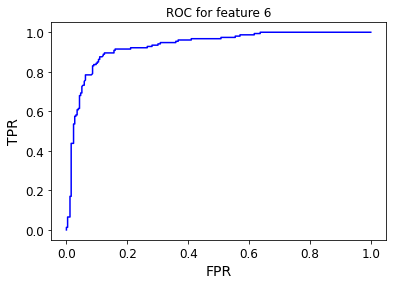

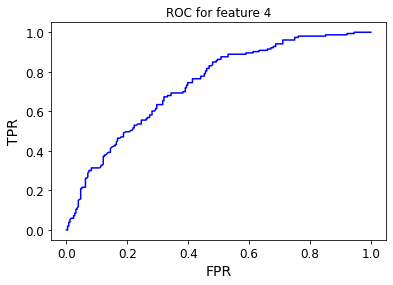

In [78]:
for n in [6, 4]:  # Best and worst feature numbers
    xfeat = X_train[:,n]
    xmin = np.min(xfeat)
    xmax = np.max(xfeat)
    y_pred = (xfeat-xmin)/(xmax-xmin)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
    plt.plot(fpr,tpr,'b')
    plt.title(f'ROC for feature {n}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

Note that the worst feature is not the one with the lowest AUC, it is the one with the AUC closest to 0.5, as ones less than this are simply inverted features and could be negated to get positive performance (with AUC>0.5).

In [79]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [80]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of mean values (to populate constant features with)
    n1, n2: index numbers of features that change (for xx and yy)
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [97]:
# print(X_train.shape)
# print(X_train[:,6].shape)
x10, x90 = np.percentile(X_train[:,6],[10,90])
# print(x10, x90)
y10, y90 = np.percentile(X_train[:,7],[10,90])
xx, yy = make_meshgrid(np.array([x10, x90]), np.array([y10, y90]), 500)
# print(xx)
fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(X_mean,(1,-1))
print(fullx)
Z = svm_pl.predict(fullx)

[[1.42037946e+01 1.93762347e+01 9.24610513e+01 ... 1.15473428e-01
  2.90677017e-01 8.39316626e-02]
 [1.42037946e+01 1.93762347e+01 9.24610513e+01 ... 1.15473428e-01
  2.90677017e-01 8.39316626e-02]
 [1.42037946e+01 1.93762347e+01 9.24610513e+01 ... 1.15473428e-01
  2.90677017e-01 8.39316626e-02]
 ...
 [1.42037946e+01 1.93762347e+01 9.24610513e+01 ... 1.15473428e-01
  2.90677017e-01 8.39316626e-02]
 [1.42037946e+01 1.93762347e+01 9.24610513e+01 ... 1.15473428e-01
  2.90677017e-01 8.39316626e-02]
 [1.42037946e+01 1.93762347e+01 9.24610513e+01 ... 1.15473428e-01
  2.90677017e-01 8.39316626e-02]]


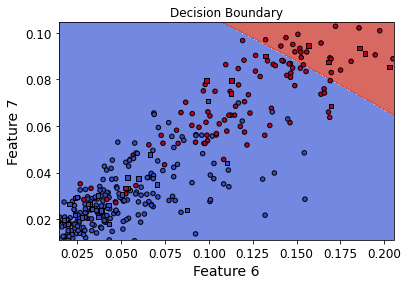

In [82]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

n0=6
n1=7

x10, x90 = np.percentile(X_train[:,n0],[10,90])
y10, y90 = np.percentile(X_train[:,n1],[10,90])
xx, yy = make_meshgrid(np.array([x10, x90]), np.array([y10, y90]), 500)

plot_contours(svm_pl, xx, yy, X_mean, n0, n1, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:,n0], X_train[:,n1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.scatter(X_val[:,n0], X_val[:,n1], c=y_val, cmap=plt.cm.coolwarm, s=20, edgecolors="k", marker='s')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(f"Feature {n0}")
plt.ylabel(f"Feature {n1}")
plt.title("Decision Boundary")

plt.show()

SVM KERNEL = linear
  Accuracy = 0.9782608695652174


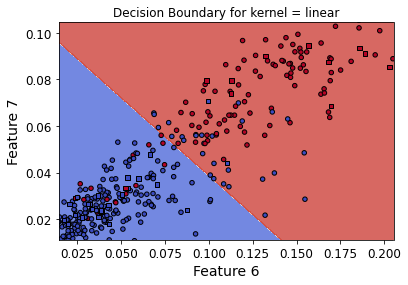

SVM KERNEL = poly
  Accuracy = 0.9347826086956522


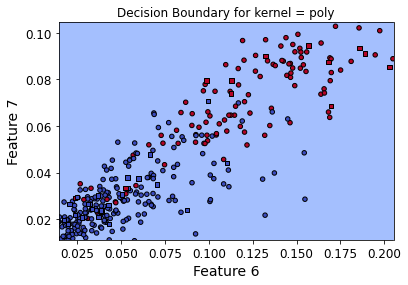

In [83]:
for kerneltype in ['linear','poly']:
    print(f'SVM KERNEL = {kerneltype}')
    svm_pl = Pipeline([('preproc',preproc_pl), ('svc',SVC(kernel=kerneltype))])
    
    svm_pl.fit(X_train,y_train)
    y_val_pred = svm_pl.predict(X_val)
    acc = accuracy_score(y_val,y_val_pred)
    print(f'  Accuracy = {acc}')
   
    plot_contours(svm_pl, xx, yy, X_mean, n0, n1, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:,n0], X_train[:,n1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.scatter(X_val[:,n0], X_val[:,n1], c=y_val, cmap=plt.cm.coolwarm, s=20, edgecolors="k", marker='s')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(f"Feature {n0}")
    plt.ylabel(f"Feature {n1}")
    plt.title(f"Decision Boundary for kernel = {kerneltype}")
    plt.show()

## Model selection

In [84]:
# Recalculating the above results as they were not stored there, but if they were, this could be avoided
for kerneltype in ['rbf','linear','poly']:
    svm_pl = Pipeline([('preproc',preproc_pl), ('svc',SVC(kernel=kerneltype))])   
    svm_pl.fit(X_train,y_train)
    y_val_pred = svm_pl.predict(X_val)
    acc = accuracy_score(y_val,y_val_pred)
    print(f'Validation accuracy = {acc} for kernel {kerneltype}')

Validation accuracy = 1.0 for kernel rbf
Validation accuracy = 0.9782608695652174 for kernel linear
Validation accuracy = 0.9347826086956522 for kernel poly


### Choose RBF as best classifier as it has the best performance on the _validation_ set

In [85]:
kerneltype = 'rbf'
svm_pl = Pipeline([('preproc',preproc_pl), ('svc',SVC(kernel=kerneltype))])  
# Refit on combined training + validation set
svm_pl.fit(np.concatenate((X_train,X_val),axis=0),np.concatenate((y_train,y_val),axis=0))
# Evaluate this model (and only the selected best model) on the test set
y_test_pred = svm_pl.predict(X_test)
acc = accuracy_score(y_test,y_test_pred)
print(f'Final test accuracy = {acc} for selected model: kernel={kerneltype}')

Final test accuracy = 0.9736842105263158 for selected model: kernel=rbf
